In [3]:
import pandas as pd
import plotnine as p9

## Task 1

1. The aesthetics used here are an x-axis that is mapped to the income variable, a y-axis that is mapped to the life_exp variable, a color fill that is mapped to the four_regions variable, and size which is mapped to the population variable.

2.

In [4]:
df1 = pd.read_csv("q1data.csv")
print(df1)

     income  life_exp  population  year      country four_regions  \
0      1910      61.0    29200000  2010  Afghanistan         asia   
1     11100      78.1     2950000  2010      Albania       europe   
2     11100      74.7    36000000  2010      Algeria       africa   
3     46900      81.9       84500  2010      Andorra       europe   
4      7680      60.8    23400000  2010       Angola       africa   
..      ...       ...         ...   ...          ...          ...   
186   20400      75.4    28400000  2010    Venezuela     americas   
187    5350      73.3    88000000  2010      Vietnam         asia   
188    4700      67.8    23200000  2010        Yemen         asia   
189    3200      57.5    13600000  2010       Zambia       africa   
190    2560      54.4    12700000  2010     Zimbabwe       africa   

                  six_regions       eight_regions           world_bank_region  
0                  south_asia           asia_west                  South Asia  
1         e

3.

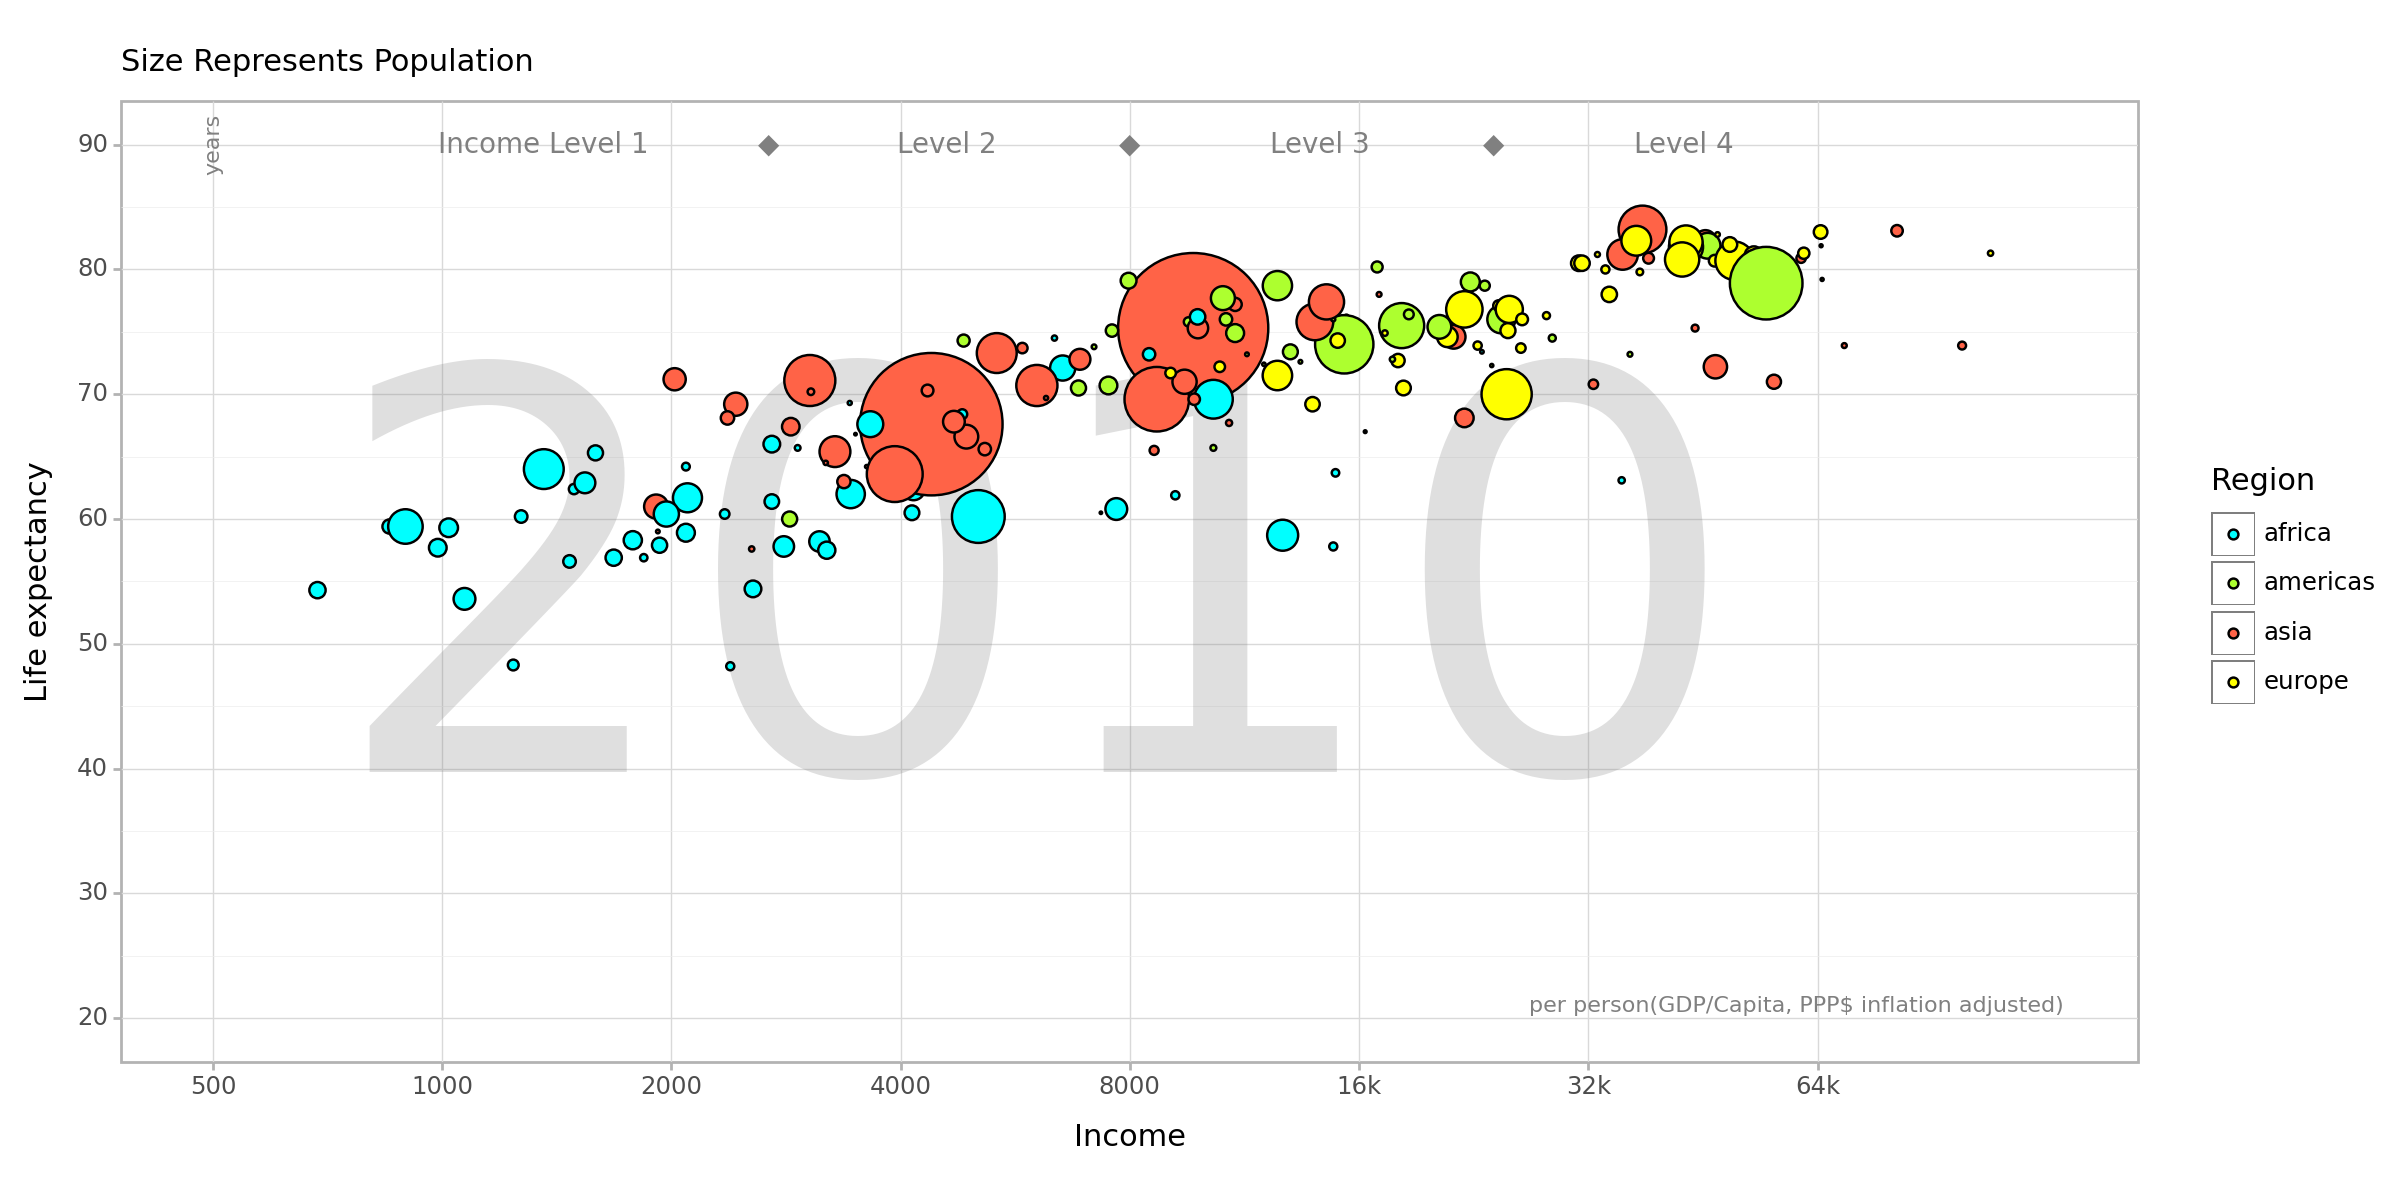

<Figure Size: (1200 x 600)>

In [5]:
p9.options.figure_size = (12, 6)
(p9.ggplot(df1,
p9.aes(
  x = "income",
  y = "life_exp",
  fill = "four_regions",
  size = "population"
))
+ p9.annotate("text", x=6000, y=52, label="2010", size=200, color='grey', alpha = 0.25)
+ p9.annotate("text", x=1360, y=90, label="Income Level 1", size=10, color='grey')
+ p9.annotate("text", x=2680, y=90, label="\u25C6", size=10, color='grey')
+ p9.annotate("text", x=4600, y=90, label="Level 2", size=10, color='grey')
+ p9.annotate("text", x=8000, y=90, label="\u25C6", size=10, color='grey')
+ p9.annotate("text", x=14200, y=90, label="Level 3", size=10, color='grey')
+ p9.annotate("text", x=24000, y=90, label="\u25C6", size=10, color='grey')
+ p9.annotate("text", x=42700, y=90, label="Level 4", size=10, color='grey')
+ p9.annotate("text", x=60000, y=21, label="per person(GDP/Capita, PPP$ inflation adjusted)", size=8, color='grey')
+ p9.annotate("text", x=500, y=90, label="years", angle = 90, size=8, color='grey')
+ p9.geom_point()
+ p9.scale_fill_manual( values={'americas': 'greenyellow', 'africa': 'cyan', 'asia': 'tomato', 'europe': 'yellow' })
+ p9.scale_size_continuous(range = [0,30], guide = False)
+ p9.scale_x_continuous(breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000], labels = [500, 1000, 2000, 4000, 8000, "16k", "32k", "64k"], trans = "log2", limits = (500, 128000))
+ p9.scale_y_continuous(breaks = [20, 30, 40, 50, 60, 70, 80, 90], limits = (20, 90))
+ p9.theme_light()
+ p9.labs(x="Income", y="Life expectancy", fill="Region", subtitle="Size Represents Population")
)

4. With a situation such as this where there are 3 continuous variables and one categorical variable, the options for different geometries become very limited. In order to address the categorical variable, facet wrapping is the best option because it allows you to display all categories separately, meaning you only have to find a geometry that addresses the 3 continuous variables. Still, having 3 continuous variables on one graph is difficult, with one of the only options other than a scatterplot being a line plot. I maintained the x and y-axes to be income and life_exp respectively. This left color to be an aesthetic I could map the final continuous variable, population, to. Since there is such a wide distribution of populations with many of the values being low, a log scale for color made more sense. The issue with this geometry is that it is extremely difficult to interpret as a line plot does not allow you to distinguish between the individual countries within each region. The only information you can glean from this chart is that there is a very loose relationship showing that as income increases, life expectency within a country increases(despite much variability). Since income is adjusted for population by being measured by GDP/Capita, there only seems to be a loose relationship showing that countries with a higher GDP/Capita tend to be smaller countries in population(although this only holds for Africa and Europe). A major issue with using a line plot in this scenario is that it implies that the data is chronological, which is not true and may confuse the audience of the plot. I would not recommend that anyone uses this chart for a report.

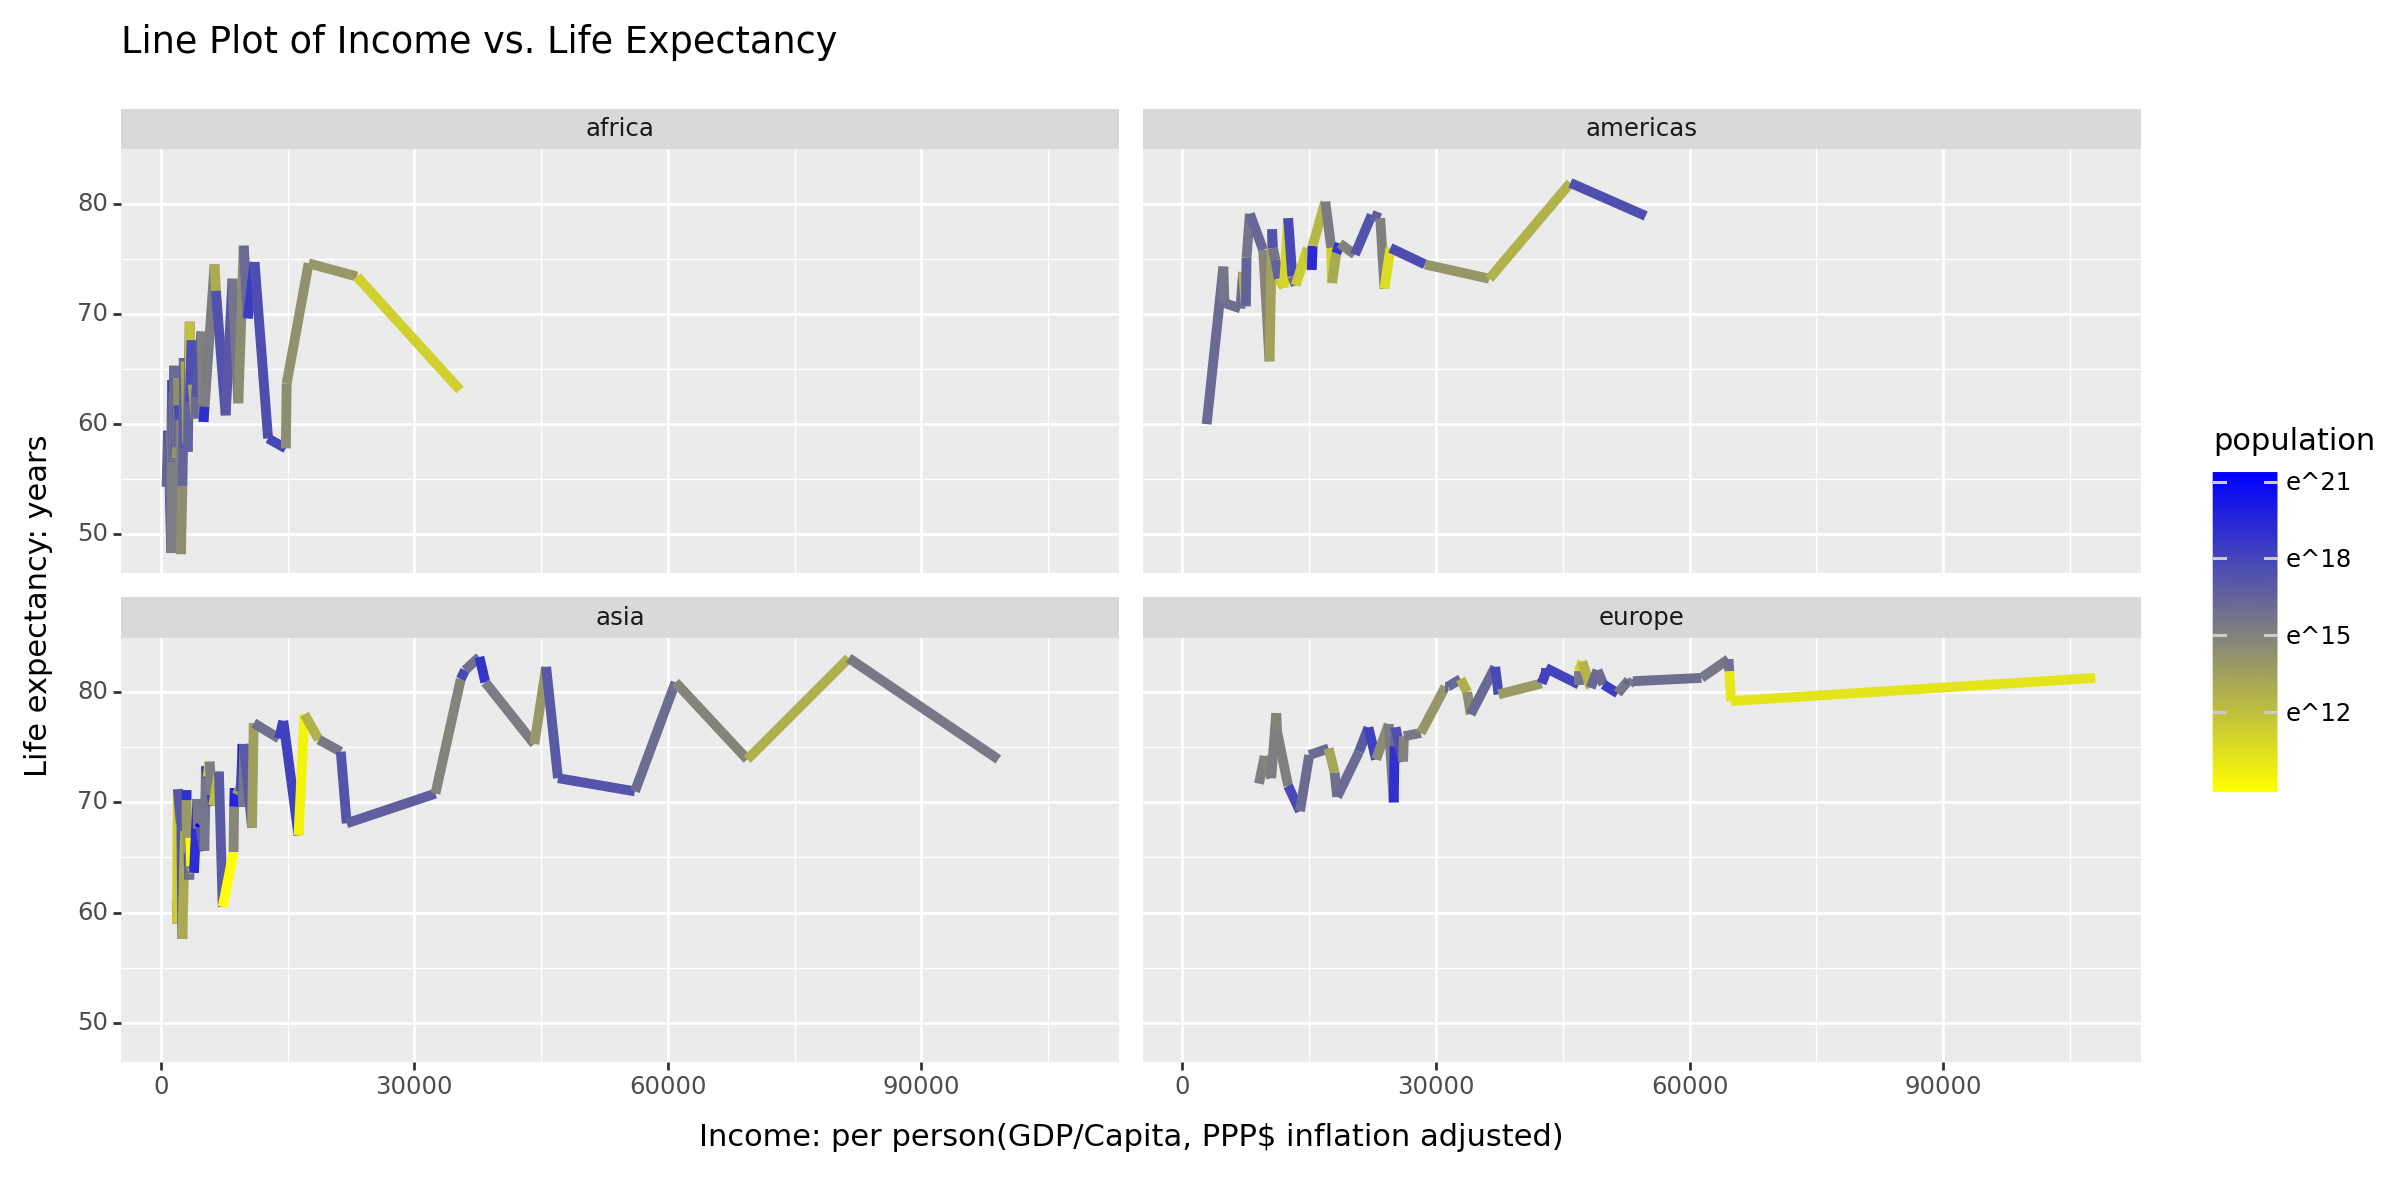

<Figure Size: (1200 x 600)>

In [18]:
df1_sorted = df1.sort_values(by = "income")
(p9.ggplot(df1_sorted,
p9.aes(
  x = "income",
  y = "life_exp",
  color = "population"
))
+ p9.geom_line(size = 2)
+ p9.scale_color_gradient(trans = "log", low = "yellow", high = "blue")
+ p9.facet_wrap("four_regions")
+ p9.labs(title="Line Plot of Income vs. Life Expectancy", x="Income: per person(GDP/Capita, PPP$ inflation adjusted)", y="Life expectancy: years", fill='Population')
)

## Task 2

1. The aesthetics in this graph are an x-axis that is mapped to the exports variable, a y-axis that is mapped to the imports variable, a color fill that is mapped to the four_regions variable, and size which is mapped to the energy variable.




2.

In [7]:
df2 = pd.read_csv("q2data.csv")
df2

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
1,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
2,12.9,10.4,1660,1997,Argentina,americas,america,america_south,Latin America & Caribbean
3,52.8,19.0,610,1997,Armenia,europe,europe_central_asia,europe_east,Europe & Central Asia
4,20.5,19.6,5550,1997,Australia,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...
122,22.9,22.6,2080,1997,Uzbekistan,asia,europe_central_asia,asia_west,Europe & Central Asia
123,22.7,20.9,2250,1997,Venezuela,americas,america,america_south,Latin America & Caribbean
124,52.2,44.8,340,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
125,31.6,24.6,617,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3.

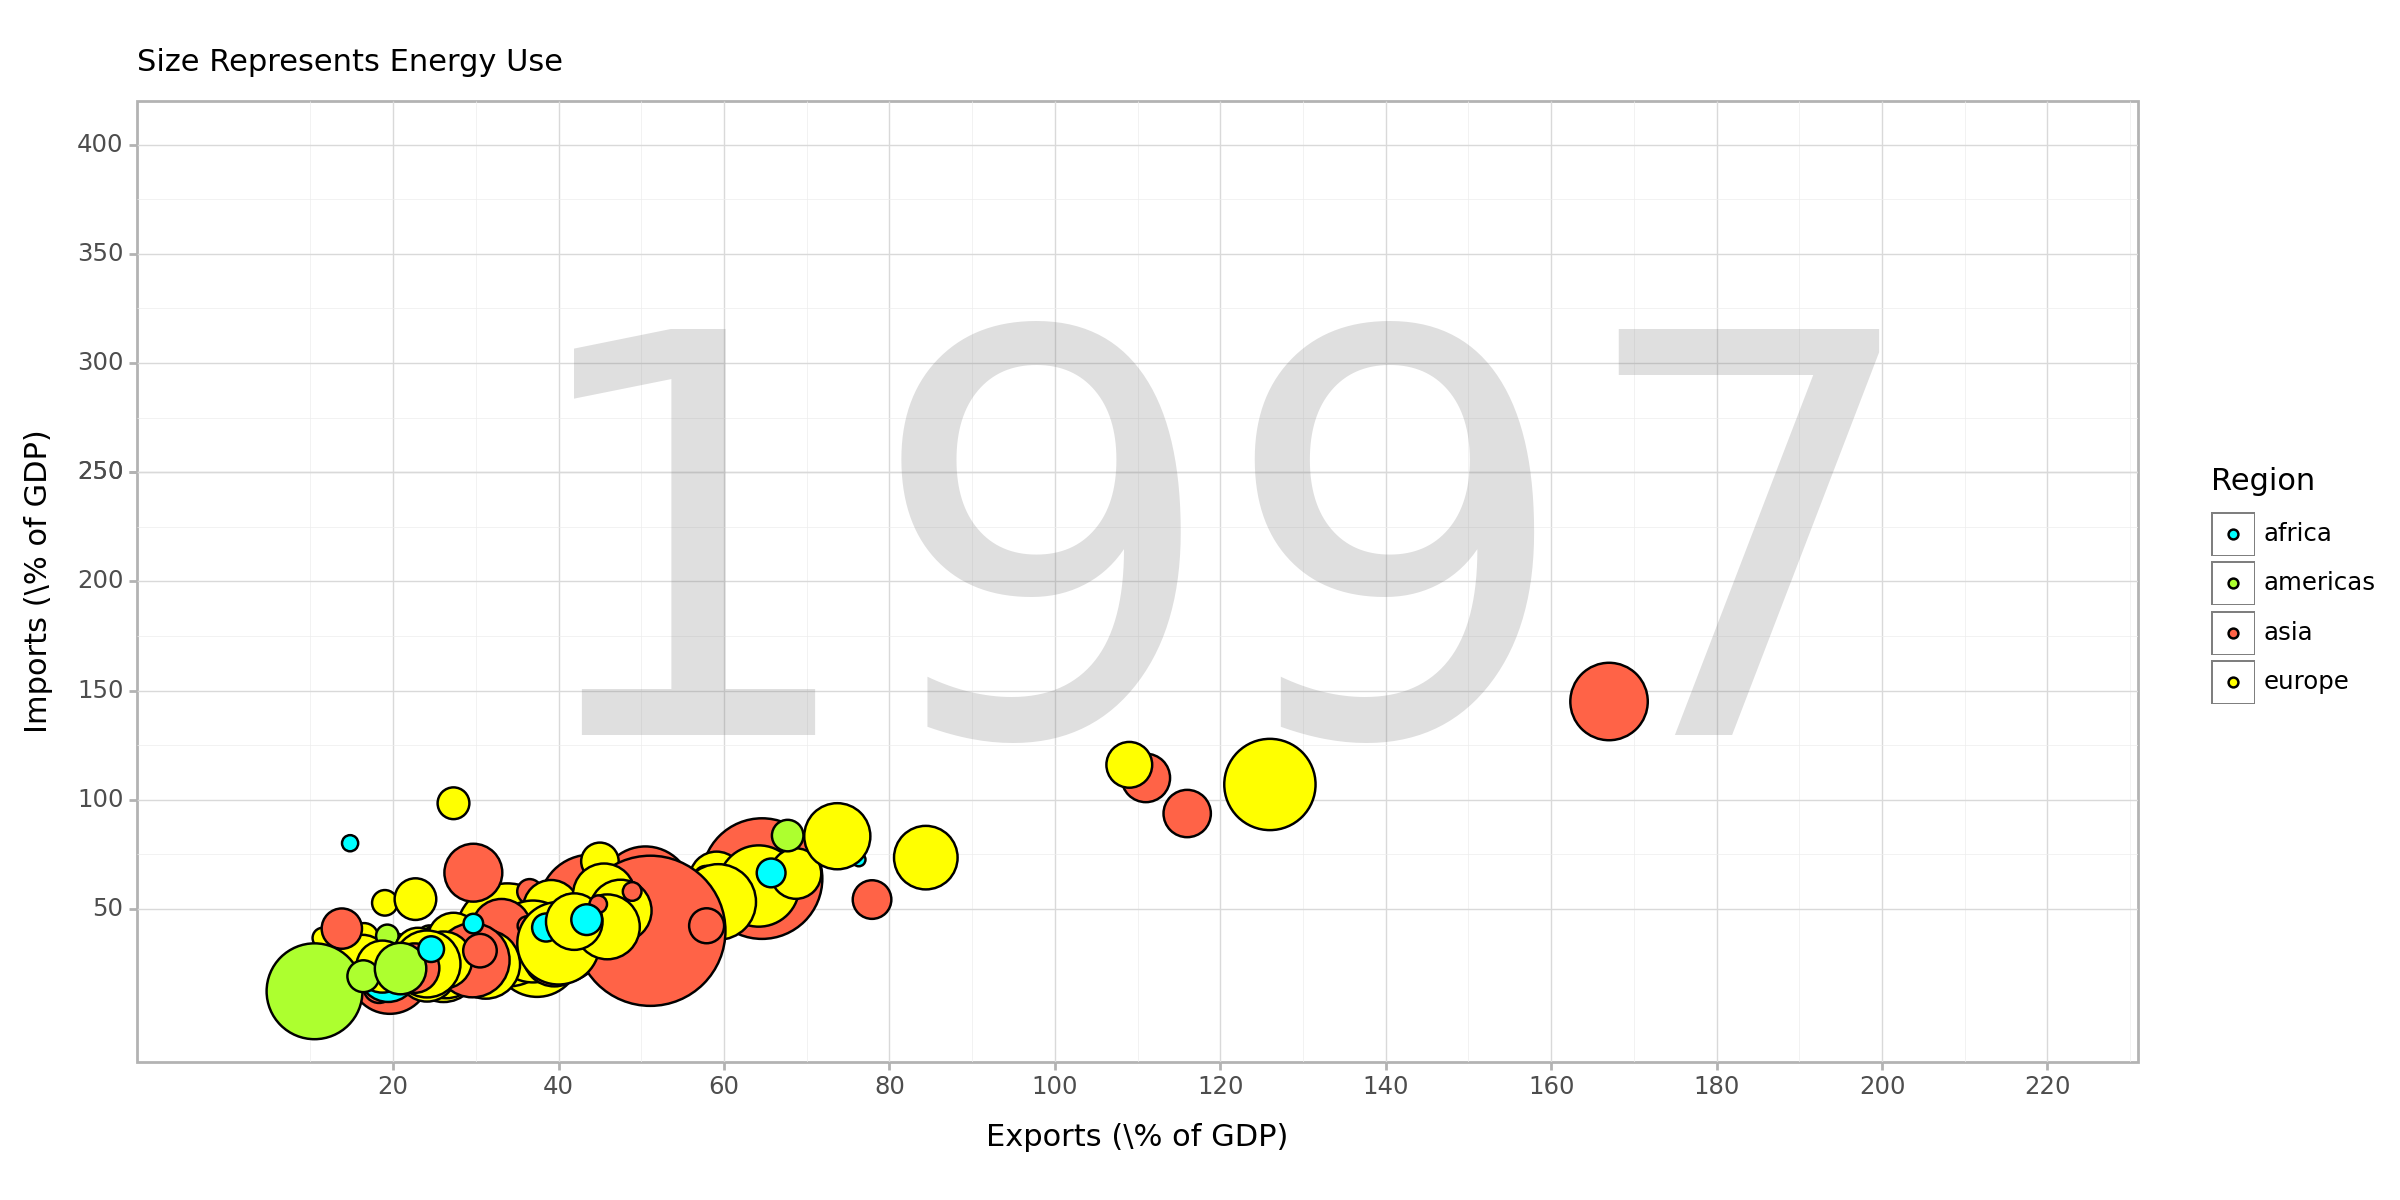

<Figure Size: (1200 x 600)>

In [8]:
p9.options.figure_size = (12, 6)
(p9.ggplot(df2,
p9.aes(
  x = "exports",
  y = "imports",
  fill = "four_regions",
  size = "energy"
))
+ p9.annotate("text", x=120, y=200, label="1997", size=200, color='grey', alpha = 0.25)
+ p9.geom_point()
+ p9.scale_fill_manual(values={'americas': 'greenyellow', 'africa': 'cyan', 'asia': 'tomato', 'europe': 'yellow' })
+ p9.scale_size_continuous(range = [0,30], guide = False)
+ p9.scale_x_continuous(breaks = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220], limits = (0, 220))
+ p9.scale_y_continuous(breaks = [50, 100, 150, 200, 250, 250, 300, 350, 400], limits = (0, 400))
+ p9.theme_light()
+ p9.labs(x="Exports (\% of GDP)", y="Imports (\% of GDP)", fill="Region", subtitle="Size Represents Energy Use")
)

4. Since making one plot with 4 variables sacrifices interpretability, I made a separate graph for each of the 3 continuous variables by plotting them on the y-axis with the categorical variable four_regions consistent as the x-axis for comparison. These boxplots are better than the alternate visualization I created for the first dataset because they are more interpretable. Having a boxplot for only 1 continuous variable across 4 values of a categorical variable is easy to follow, showing the mean of each continuous variable by category as well as the first and third quartile and outliers. One downside to having 3 graphs display this information is that it is difficult to see the relationship between the continuous variables. While it is easy to see the effect of the categorical variable on each continuous variable, the interactions between the continuous variables are lost in this visualization. I would recommend this over the line graph above but still would not present this in a report.

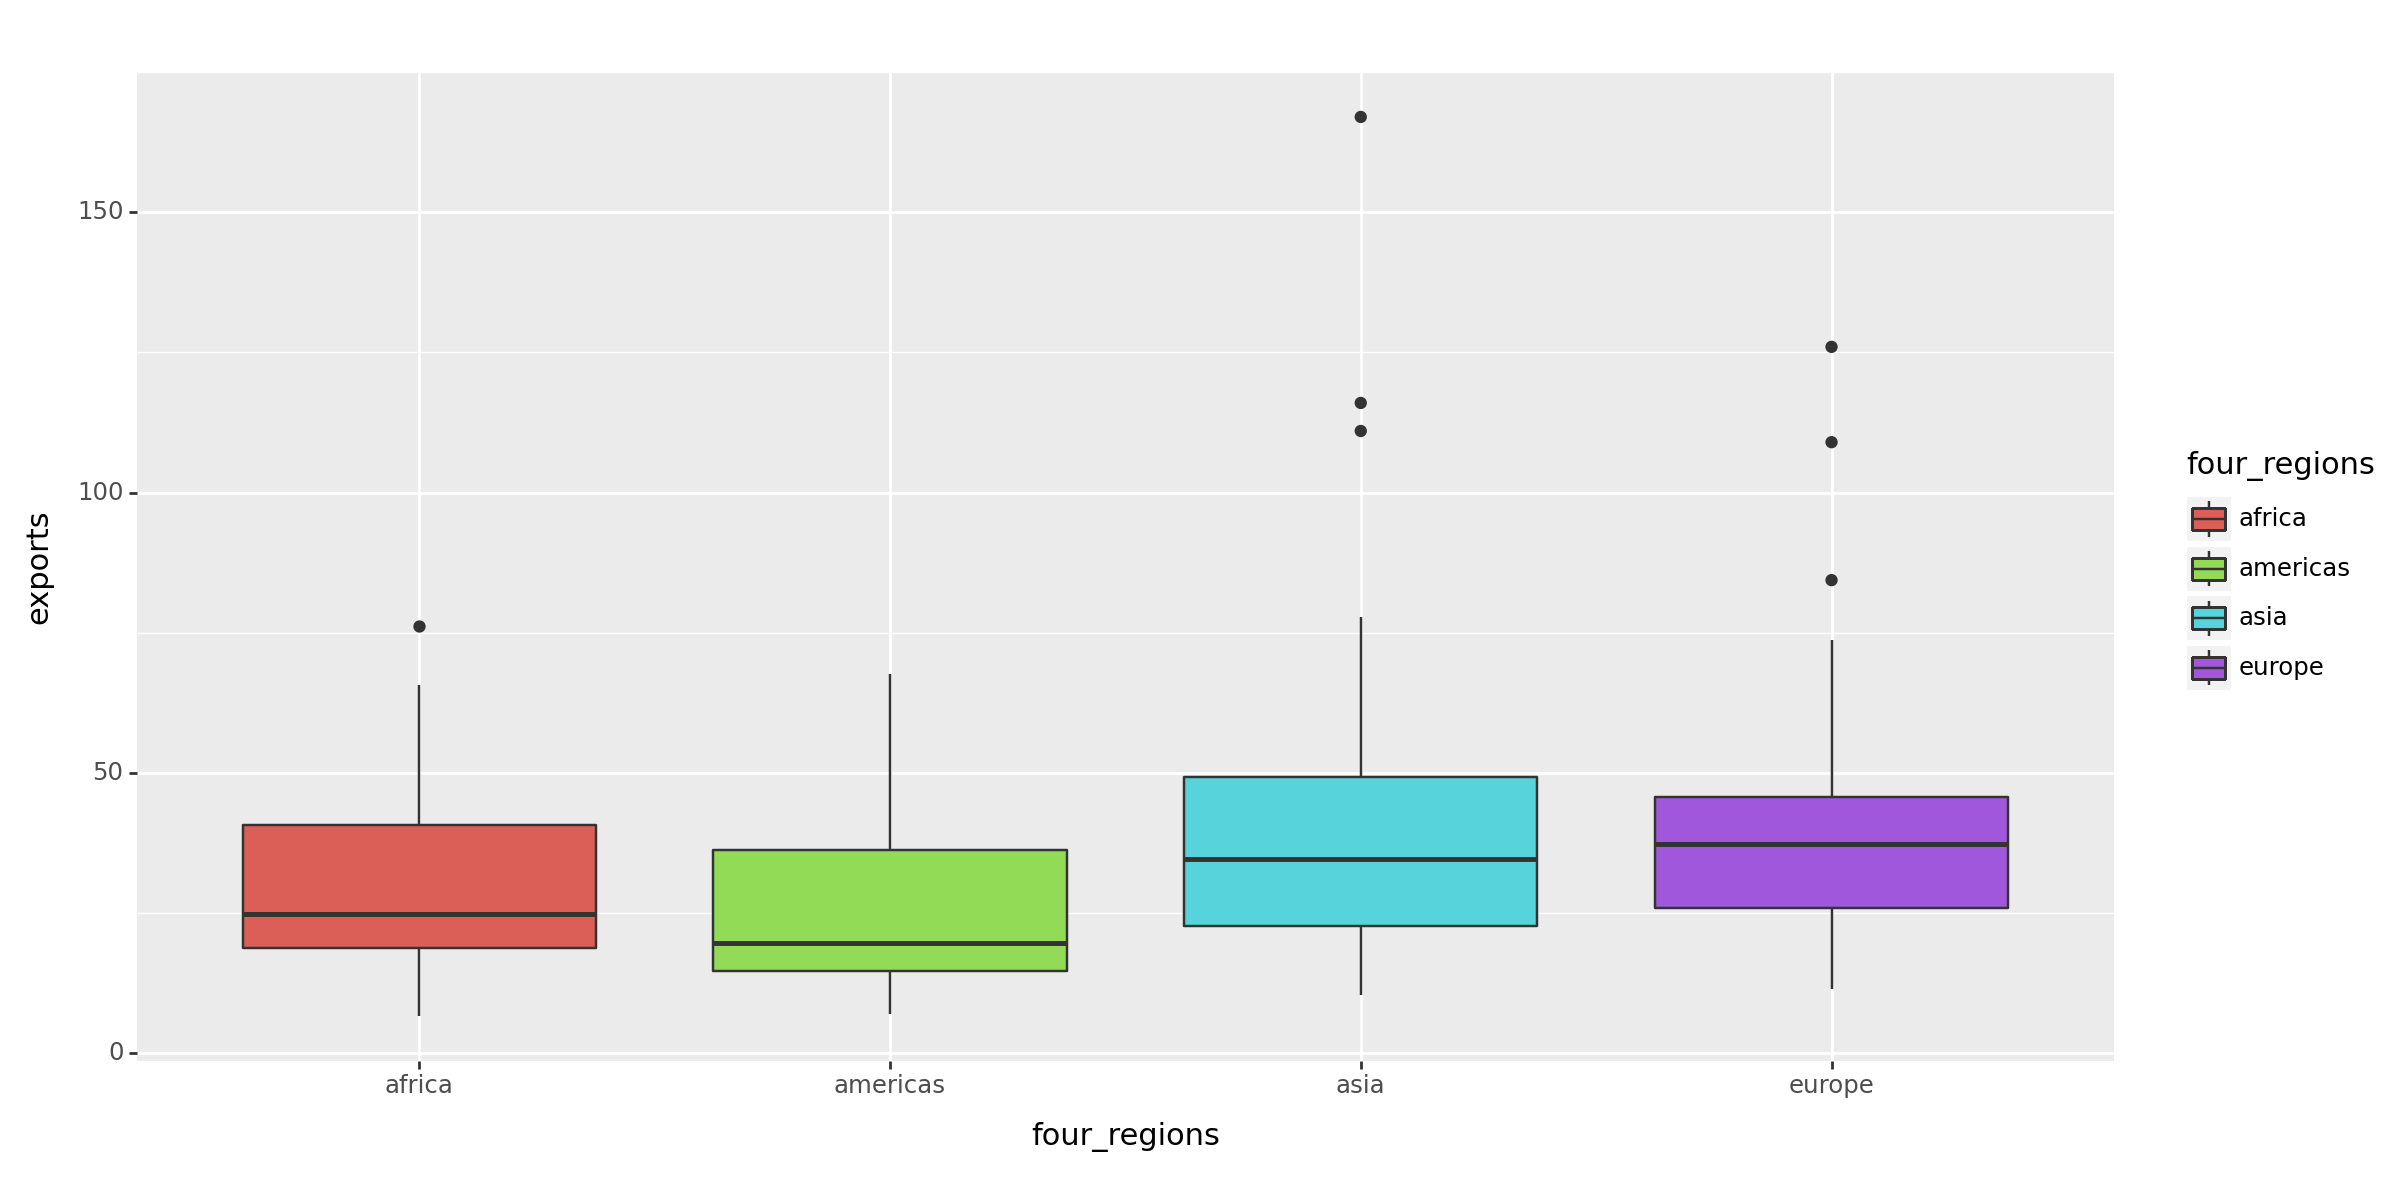

<Figure Size: (1200 x 600)>

In [9]:
(p9.ggplot(df2,
p9.aes(
  x = "four_regions",
  y = "exports",
  fill = "four_regions"
))
+ p9.geom_boxplot()
)

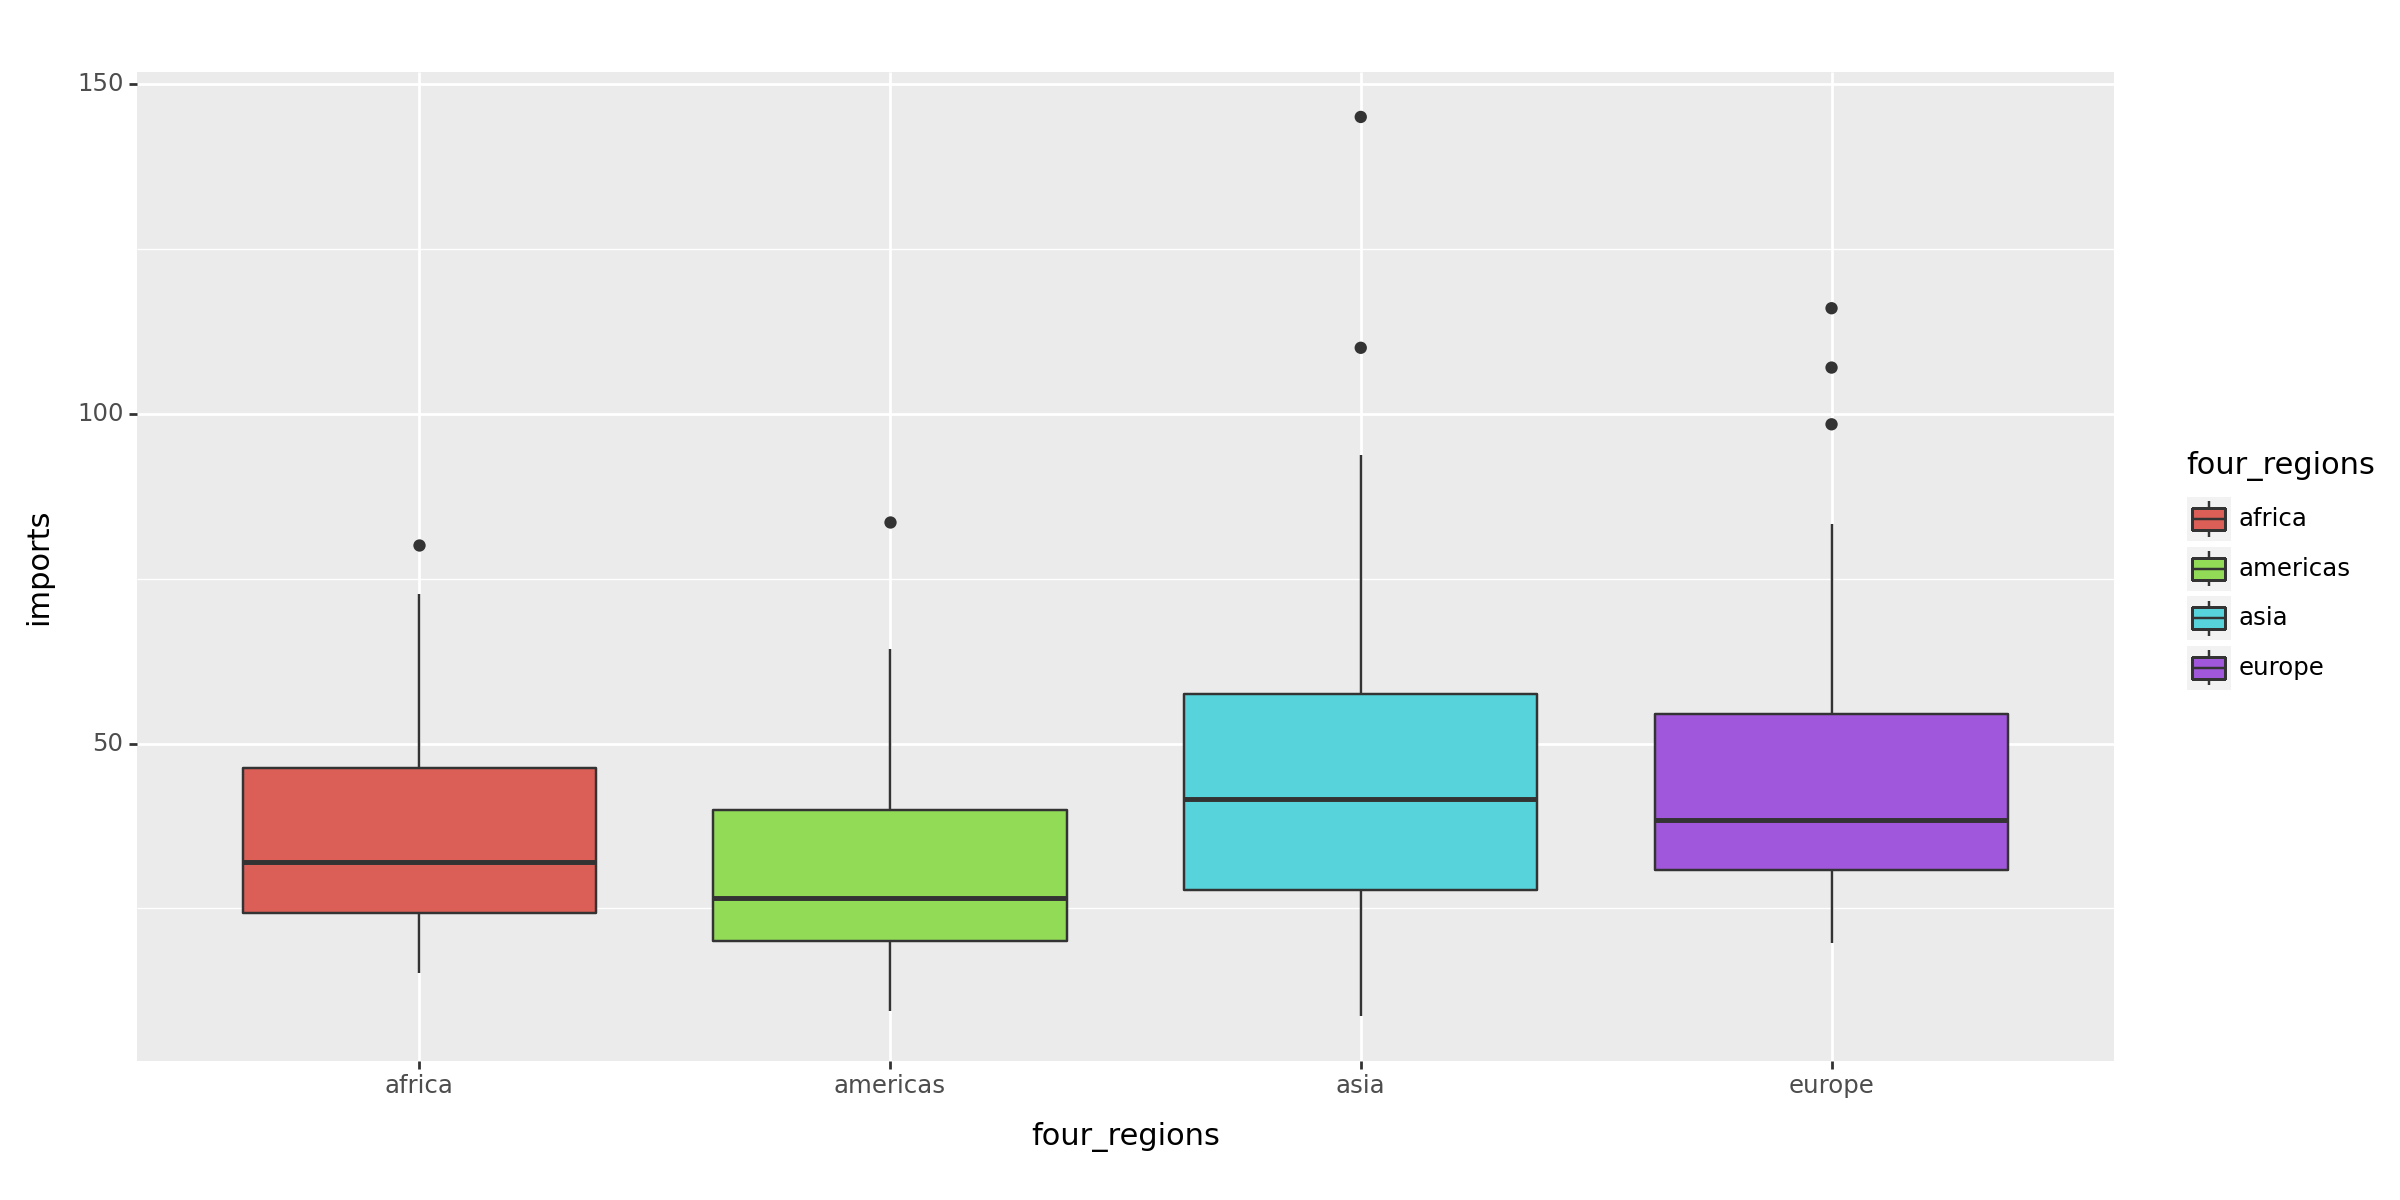

<Figure Size: (1200 x 600)>

In [10]:
(p9.ggplot(df2,
p9.aes(
  x = "four_regions",
  y = "imports",
  fill = "four_regions"
))
+ p9.geom_boxplot()
)

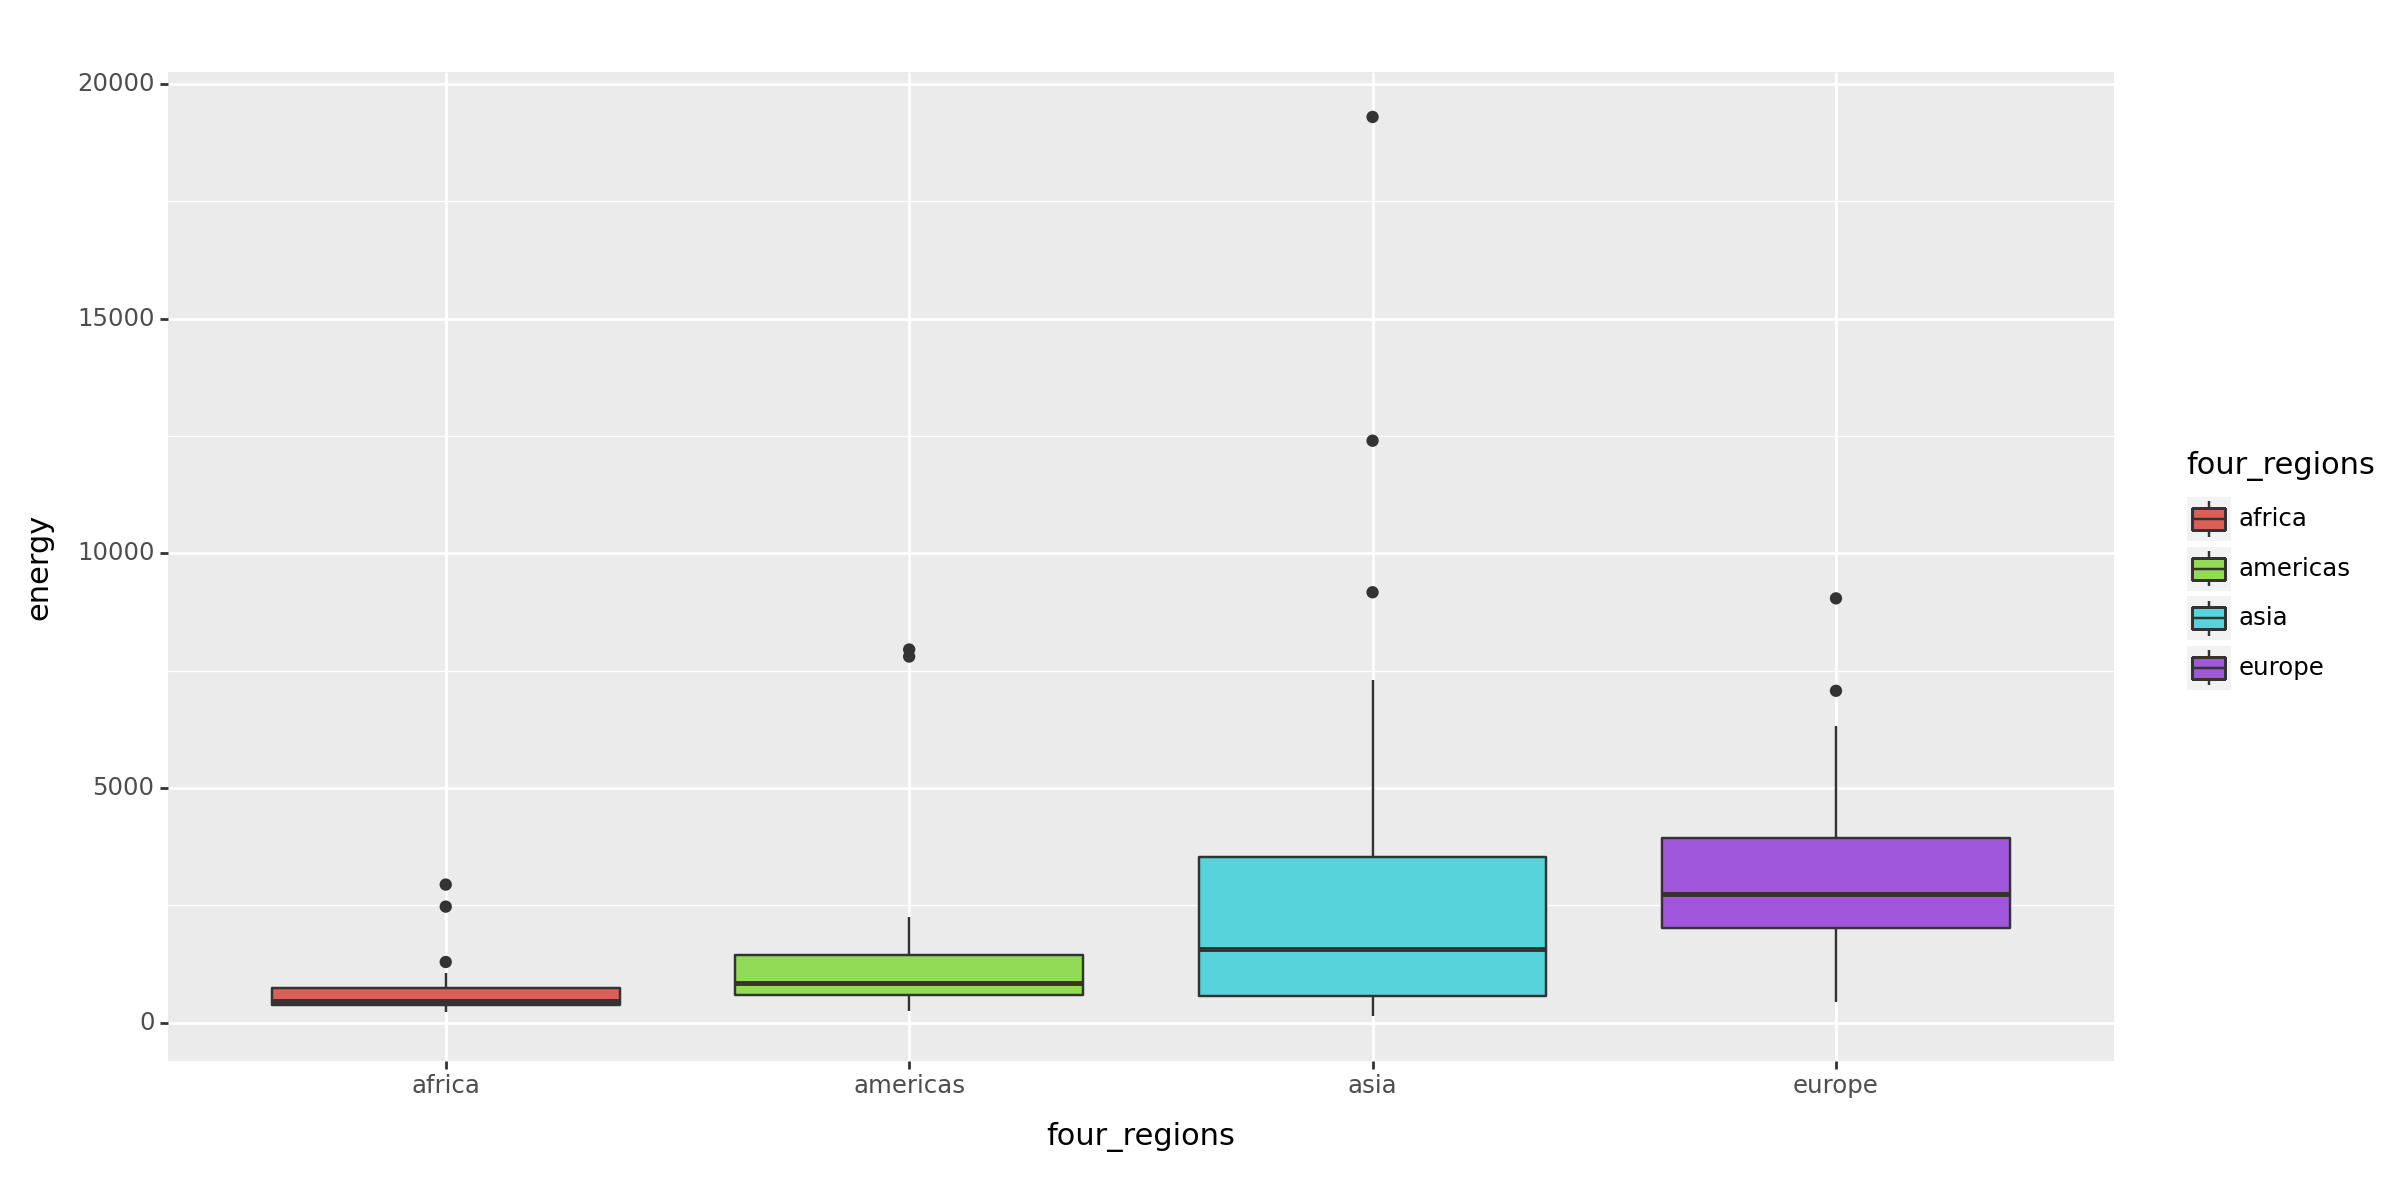

<Figure Size: (1200 x 600)>

In [11]:
(p9.ggplot(df2,
p9.aes(
  x = "four_regions",
  y = "energy",
  fill = "four_regions"
))
+ p9.geom_boxplot()
)

## Task 3

1. The aesthetics in this graph are an x-axis that is mapped to the internet_users variable, a y-axis that is mapped to the gdp variable, a color fill that is mapped to the four_regions variable, and size which is mapped to the income variable.

2.

In [12]:
df3 = pd.read_csv("q3data.csv")
print(df3)

     internet_users      gdp   income  year      country four_regions  \
0           0.00456    330.0   1190.0  2001  Afghanistan         asia   
1           0.39000   2570.0   6780.0  2001      Albania       europe   
2           1.59000   3770.0   9230.0  2001      Algeria       africa   
3          11.30000  42600.0  35600.0  2001      Andorra       europe   
4           0.27000   2440.0   2900.0  2001       Angola       africa   
..              ...      ...      ...   ...          ...          ...   
188         4.91000  10800.0  14800.0  2001    Venezuela     americas   
189         1.85000    847.0   3270.0  2001      Vietnam         asia   
190         0.51900   1190.0   4940.0  2001        Yemen         asia   
191         0.47800    991.0   2080.0  2001       Zambia       africa   
192         1.10000   1330.0   3190.0  2001     Zimbabwe       africa   

                  six_regions       eight_regions           world_bank_region  
0                  south_asia           asi

3.

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale.py:783: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


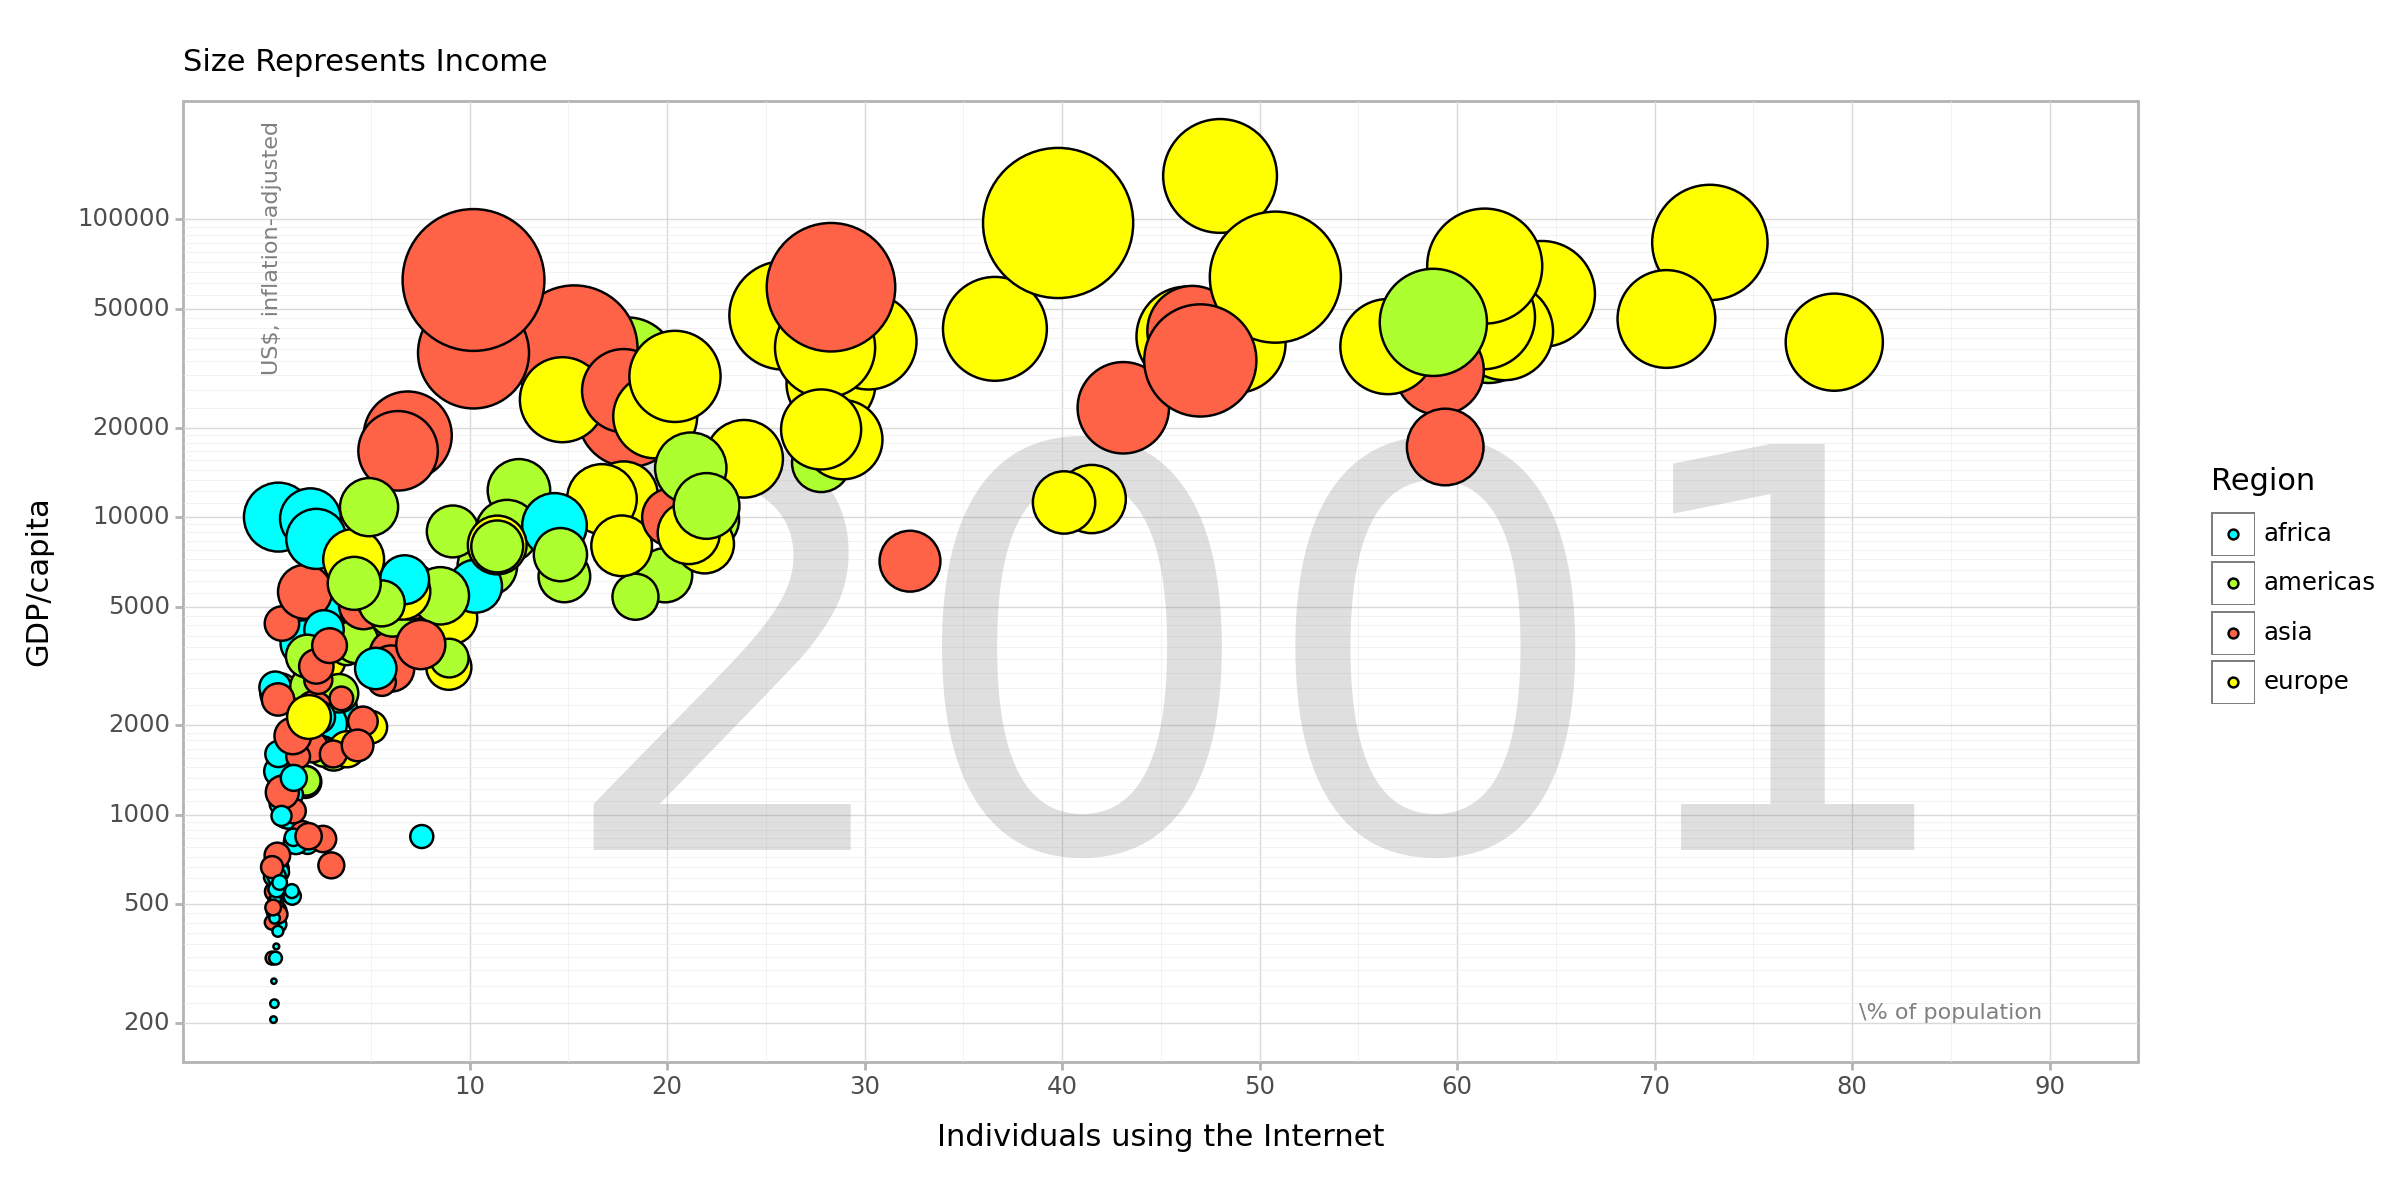

<Figure Size: (1200 x 600)>

In [13]:
p9.options.figure_size = (12, 6)
(p9.ggplot(df3,
p9.aes(
  x = "internet_users",
  y = "gdp",
  fill = "four_regions",
  size = "income"
))
+ p9.annotate("text", x=50, y=2500, label="2001", size=200, color='grey', alpha = 0.25)
+ p9.annotate("text", x=85, y=215, label="\% of population", size=8, color='grey')
+ p9.annotate("text", x=0, y=80000, label="US$, inflation-adjusted", angle = 90, size=8, color='grey')
+ p9.geom_point()
+ p9.scale_fill_manual( values={'americas': 'greenyellow', 'africa': 'cyan', 'asia': 'tomato', 'europe': 'yellow' })
+ p9.scale_size_continuous(range = [0,30], guide = False)
+ p9.scale_x_continuous(breaks = [10, 20, 30, 40, 50, 60, 70, 80, 90], limits = (0, 90))
+ p9.scale_y_log10(breaks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], labels = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],limits = (0, 250000))
+ p9.theme_light()
+ p9.labs(x="Individuals using the Internet", y="GDP/capita", fill="Region", subtitle="Size Represents Income")
)

4. Similarly to the alternate visualization for dataset 2, I made a separate graph for each of the 3 continuous variables by plotting them on the y-axis with the categorical variable four_regions consistent as the x-axis for comparison. This time, however, I utilized a violin plot to illustrate the distribution of countries within each region by the continuous variables. These plots once again do a good job of displaying the relationship between the categorical variable and each continuous variable. However, these plots still have the issue of lacking the relationship between continuous variables, but may be considered an improvement over the boxplots since it visually shows the distribution of countries within each region. Without the context of the bubble chart, the interpretability of understanding that there are different countries within each region may be lost. Because of this, I still would not recommend this for a report despite it being the best of the alternates I found.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 7 rows containing non-finite values.


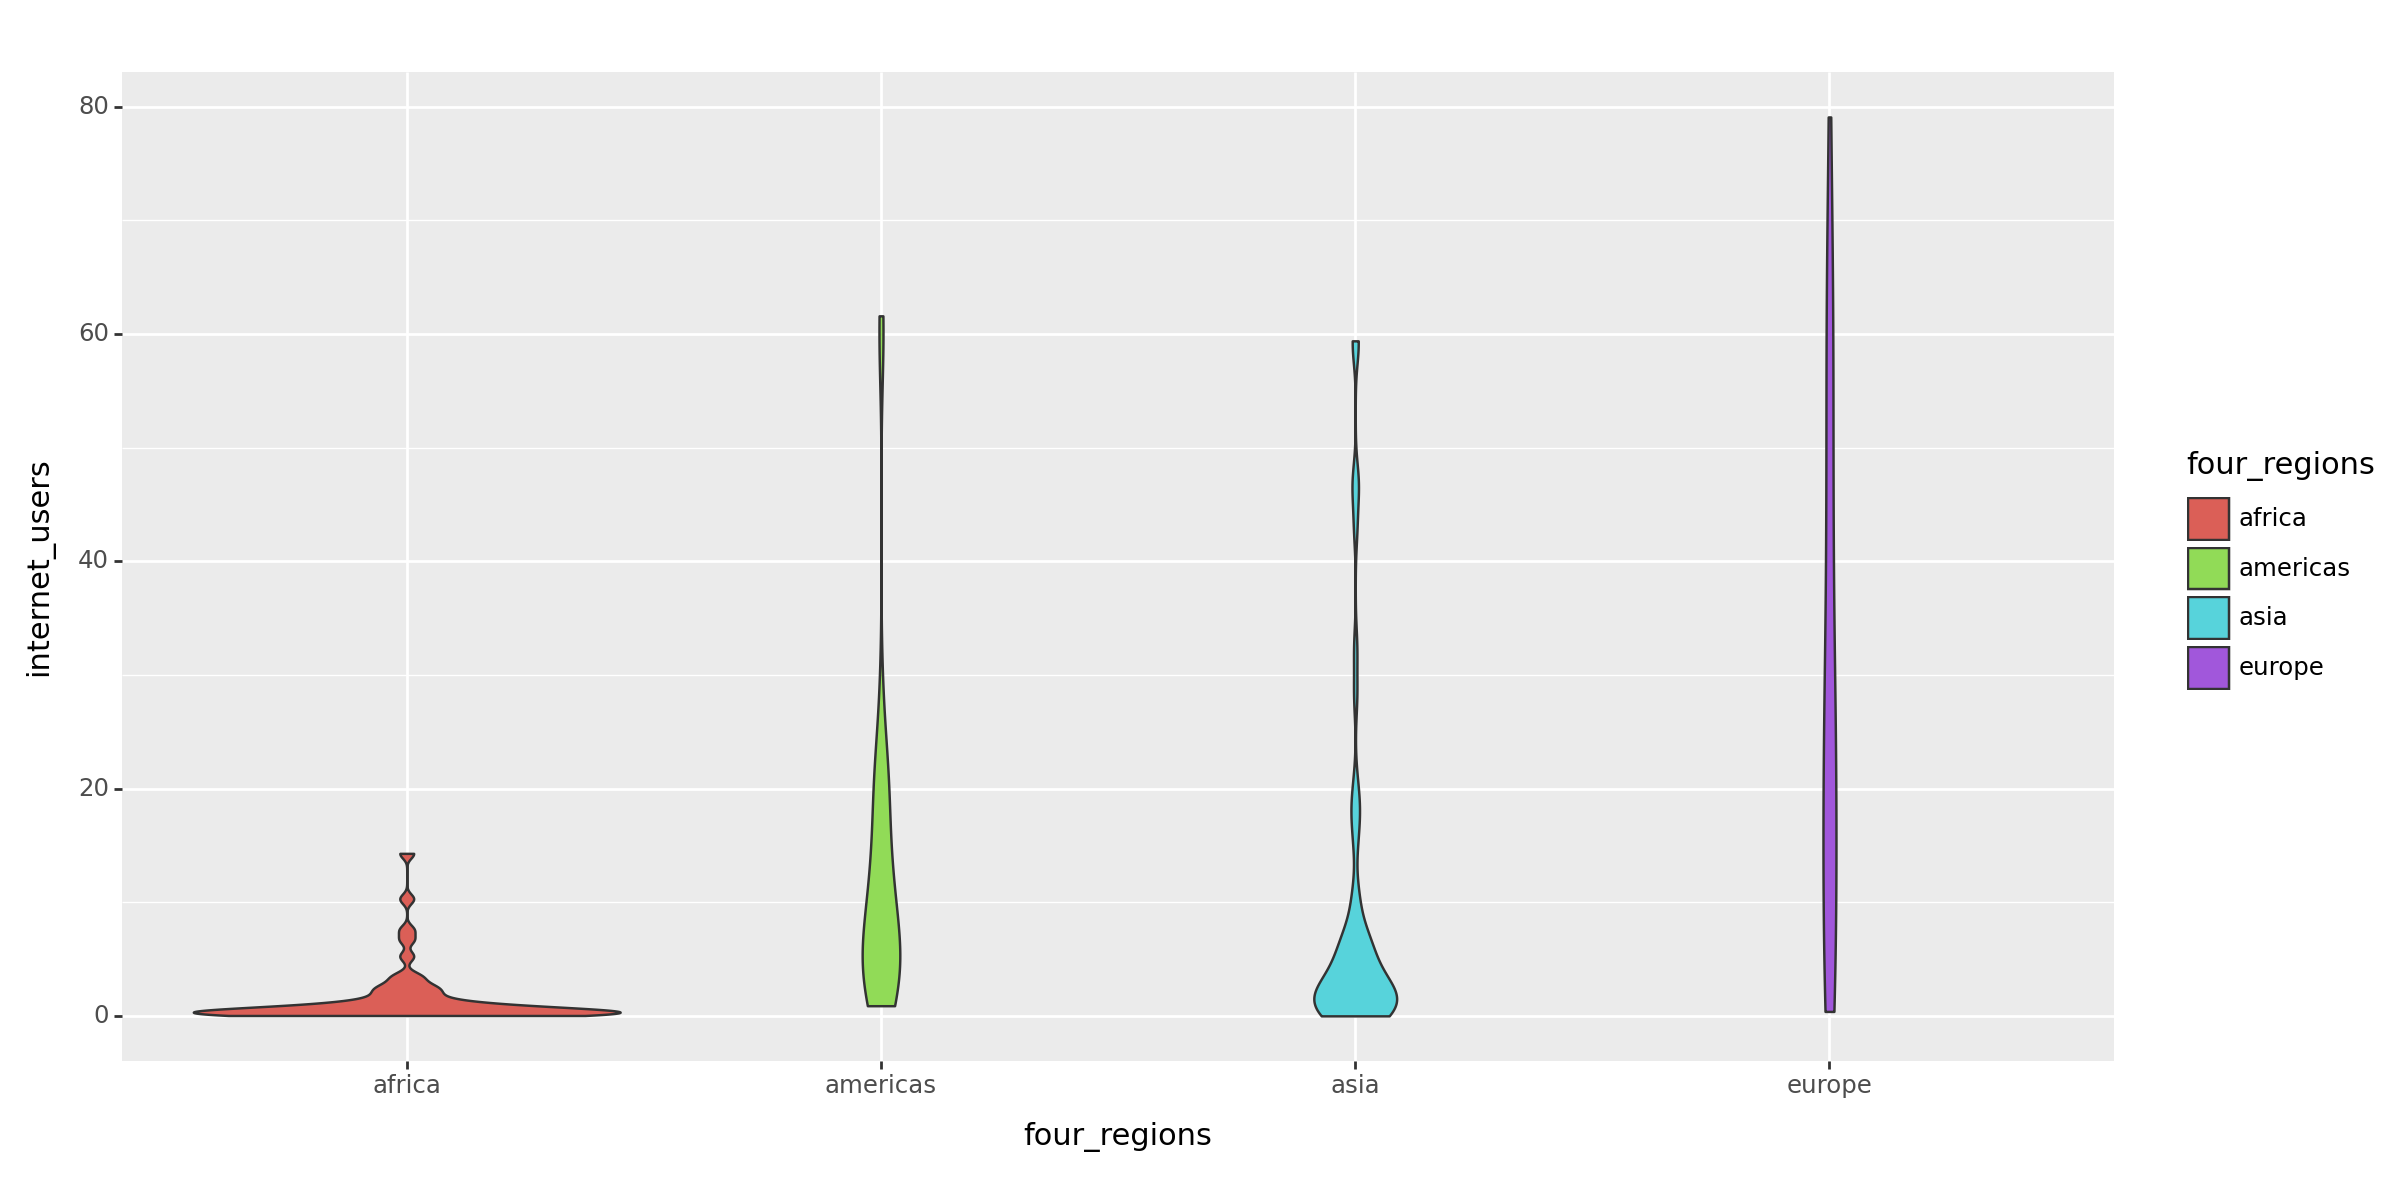

<Figure Size: (1200 x 600)>

In [14]:
(p9.ggplot(df3,
p9.aes(
  x = "four_regions",
  y = "internet_users",
  fill = "four_regions"
))
+ p9.geom_violin()
)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 7 rows containing non-finite values.


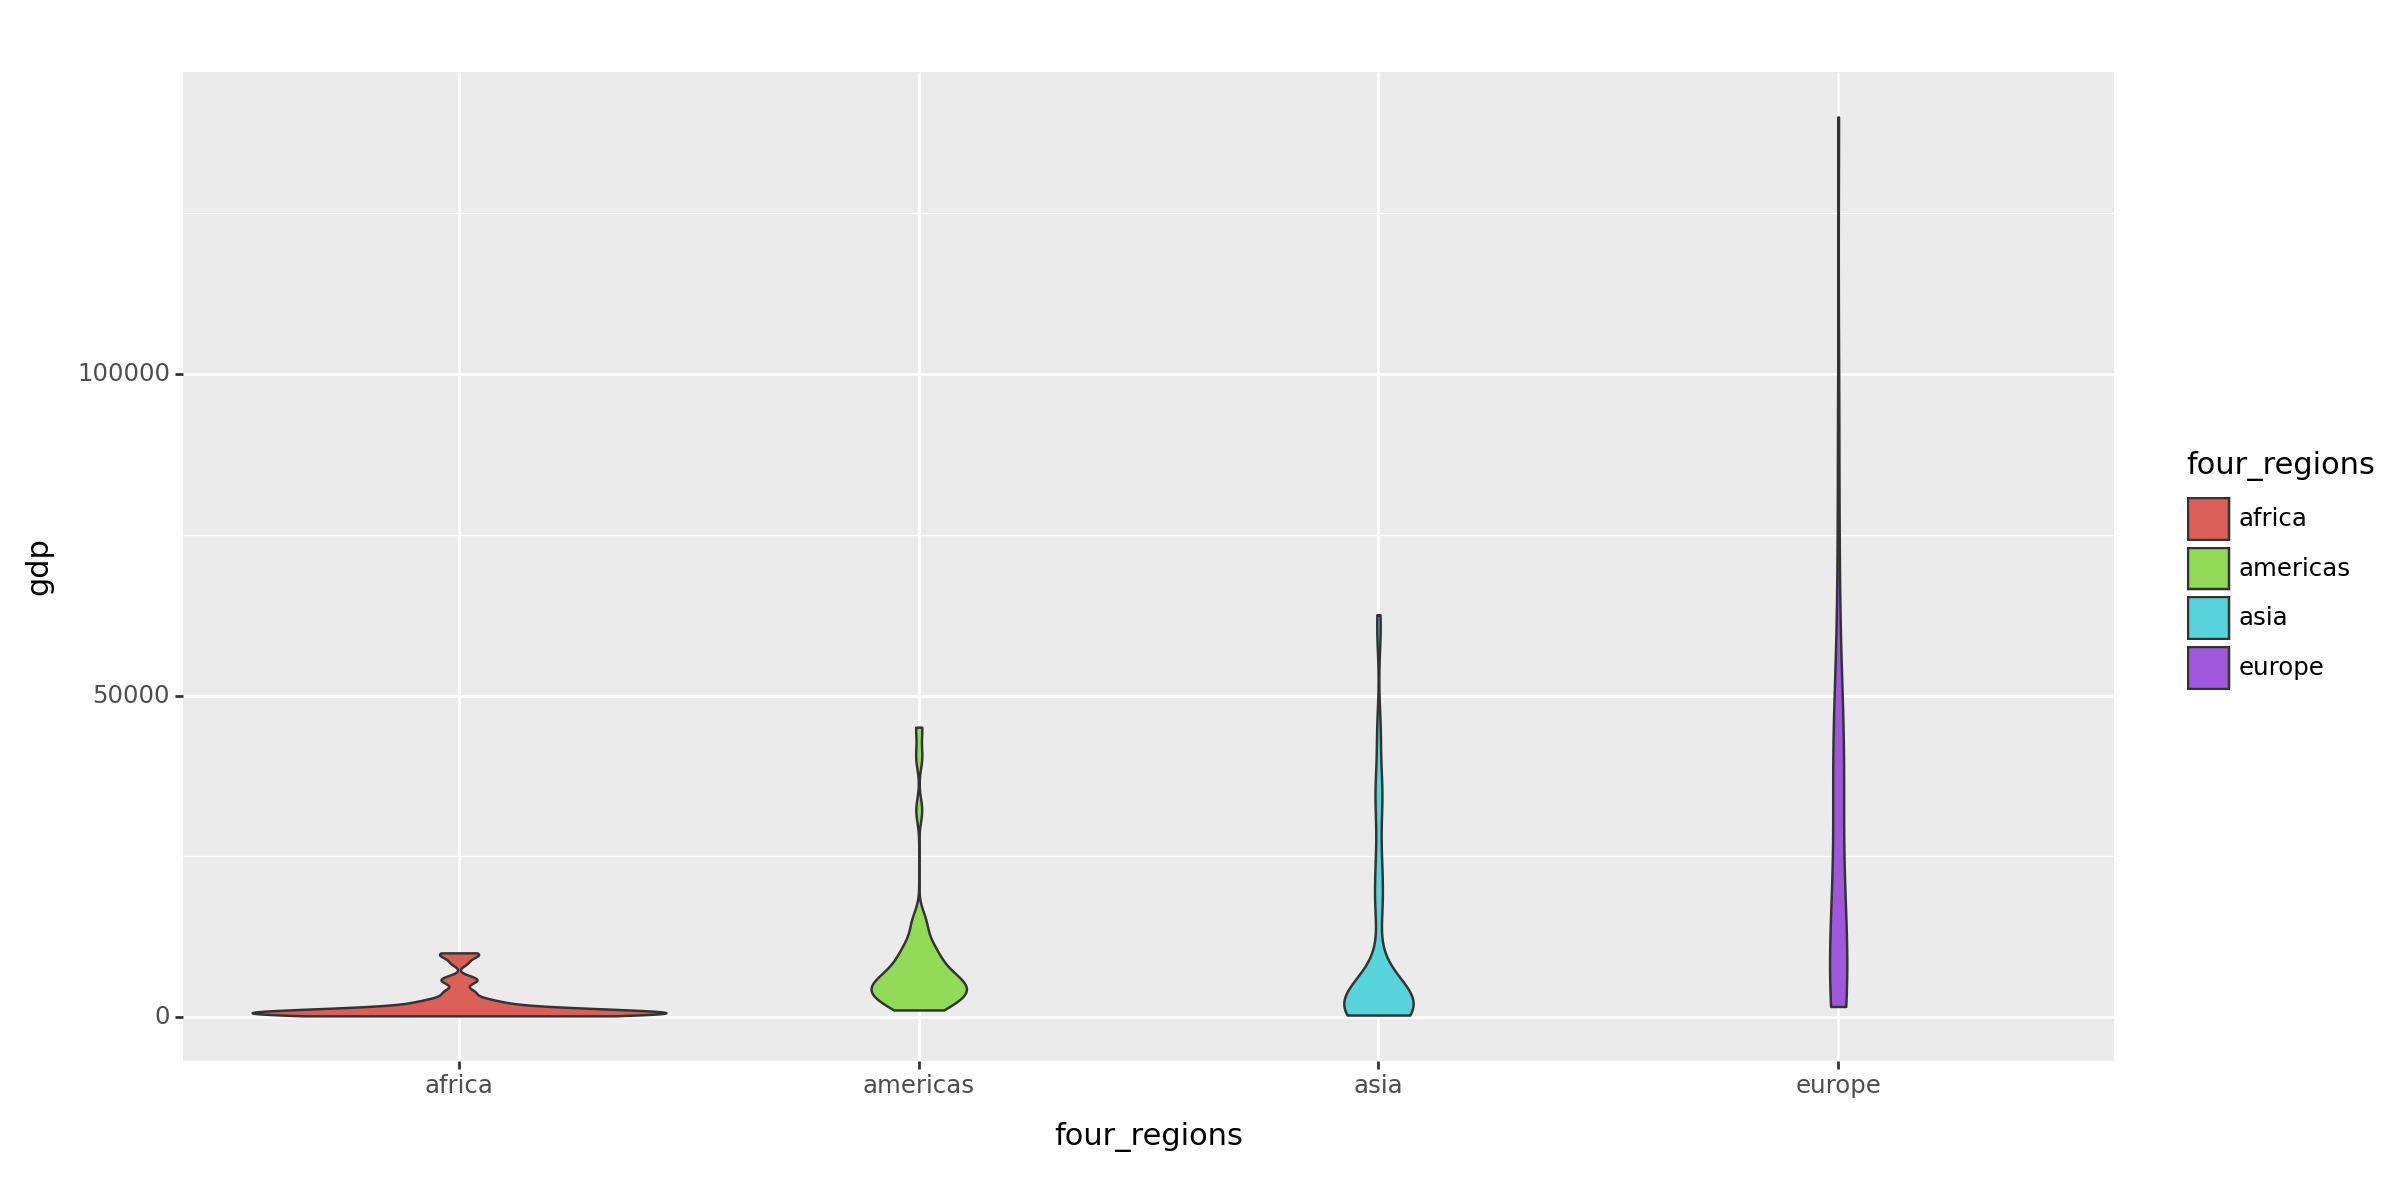

<Figure Size: (1200 x 600)>

In [15]:
(p9.ggplot(df3,
p9.aes(
  x = "four_regions",
  y = "gdp",
  fill = "four_regions"
))
+ p9.geom_violin()
)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 1 rows containing non-finite values.


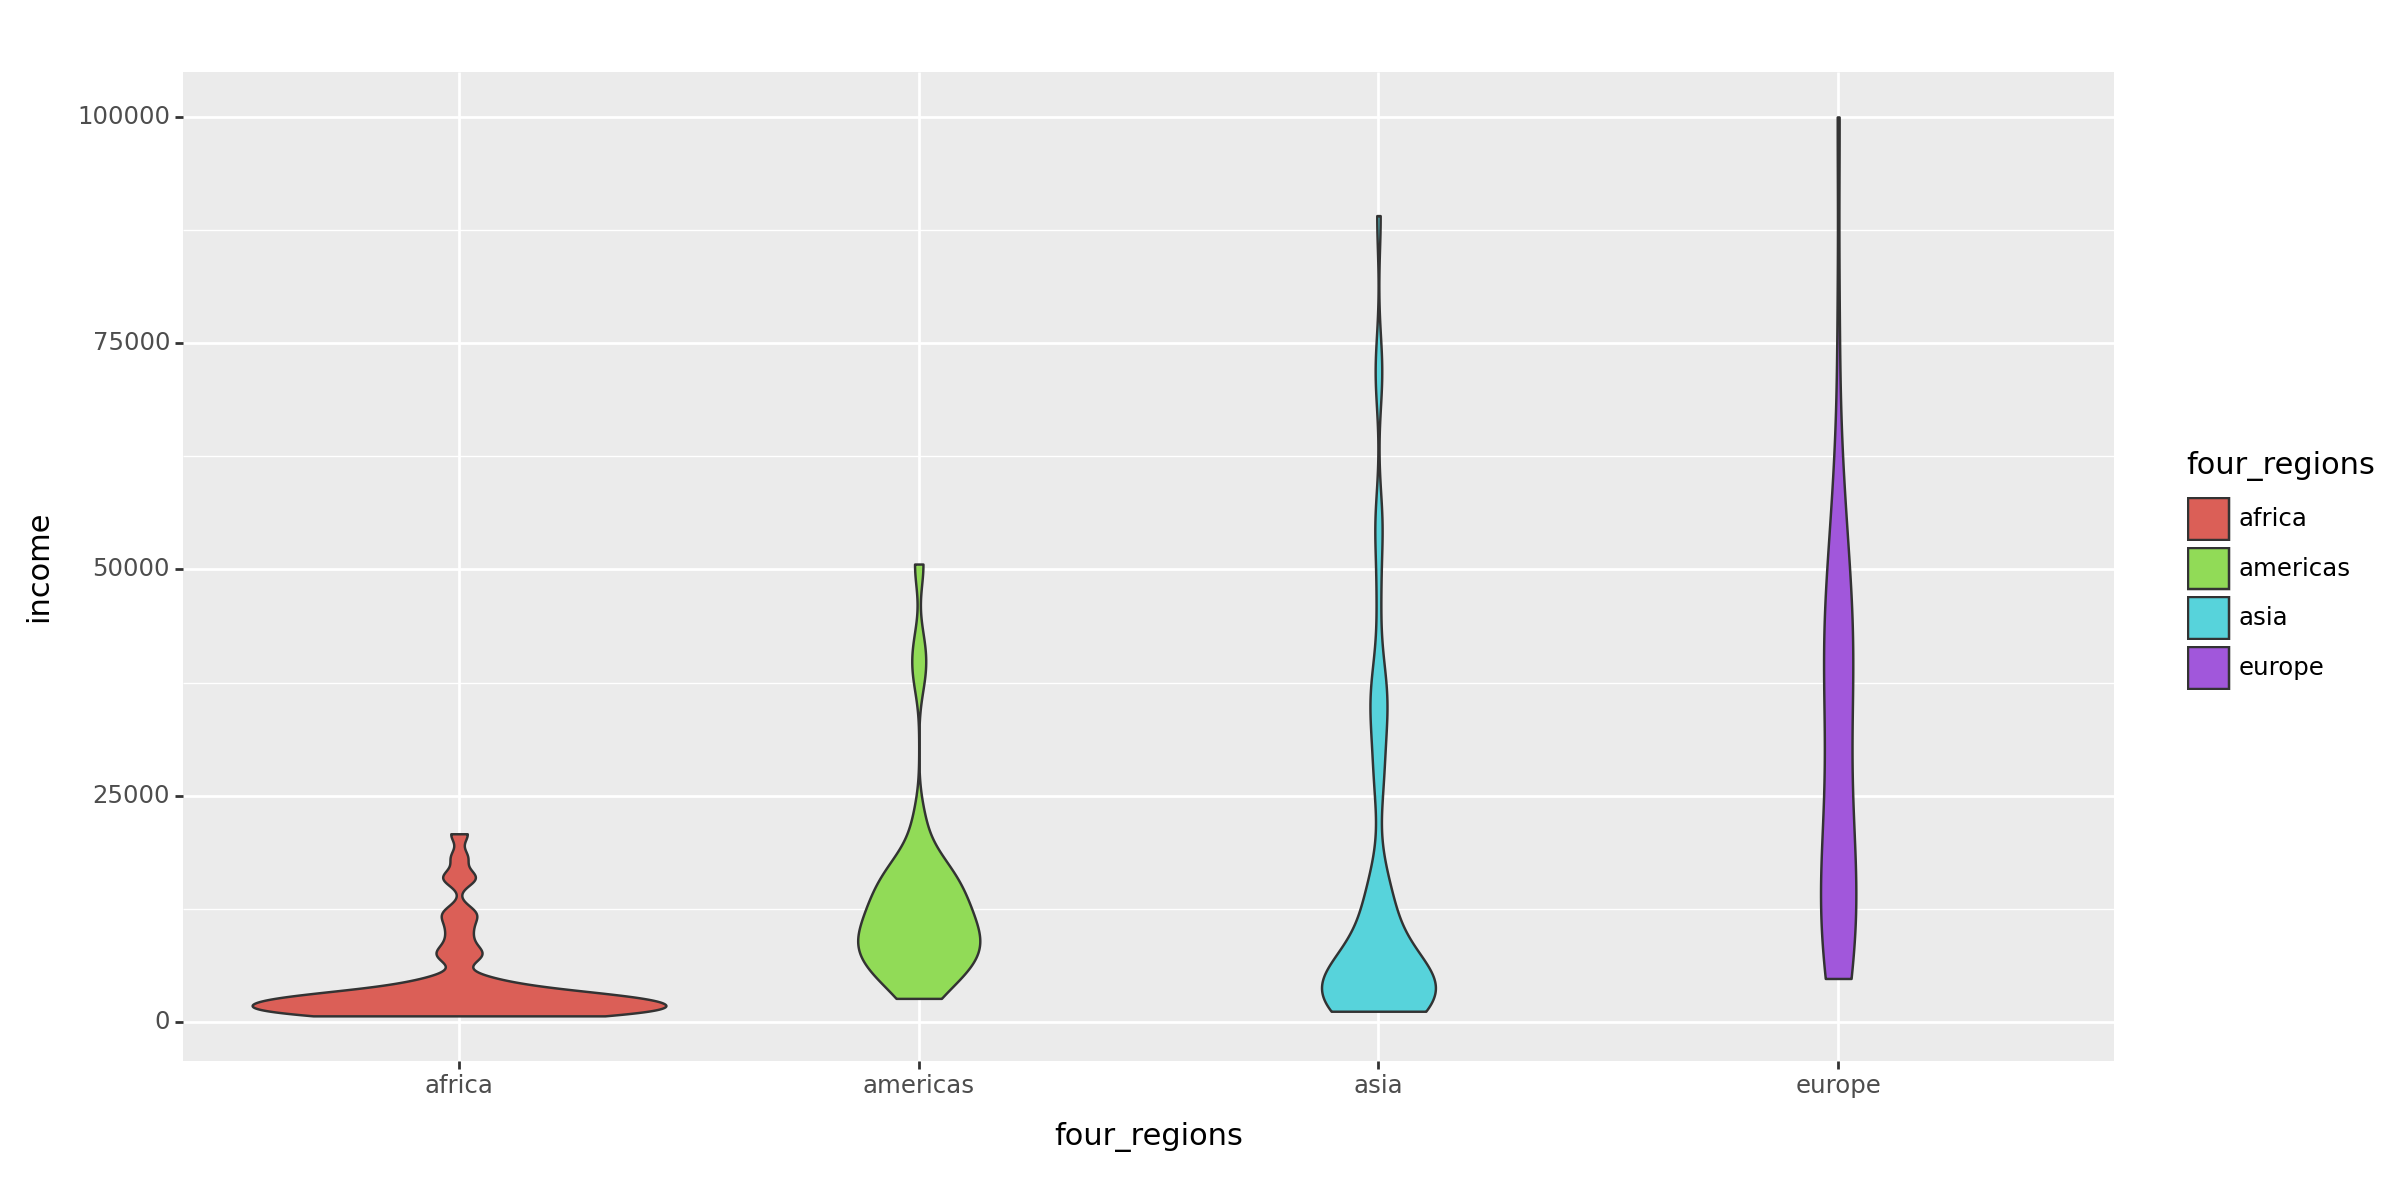

<Figure Size: (1200 x 600)>

In [16]:
(p9.ggplot(df3,
p9.aes(
  x = "four_regions",
  y = "income",
  fill = "four_regions"
))
+ p9.geom_violin()
)

Citations:

https://plotnine.readthedocs.io/en/v0.12.3/api.html#
https://stackoverflow.com/questions/73632511/how-do-i-set-scaling-for-axes-using-plotnine
https://matplotlib.org/3.1.0/gallery/color/named_colors.html
https://stackoverflow.com/questions/10437442/place-a-border-around-points
https://www.geeksforgeeks.org/python-pandas-dataframe-sort_values-set-1/

Assisted by ChatGPT for:
- log2 transformation
- unicode and rotated annotations
- x-axis tick labeling under scale_x_continuous
- setting figure size